<a href="https://colab.research.google.com/github/dlsnfl03/Road-Segmentation_U-Net/blob/main/Nixtla_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1Dj1kaiVq-DG3pqzQ_C9SaehiNrvkA2M6)


#데이터불러오기 (캐글 traffic)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hasibullahaman/traffic-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hasibullahaman/traffic-prediction-dataset/versions/2


In [ ]:
import pandas as pd
import os

# 디렉터리 확인
print("Files in the directory:", os.listdir(path))


filename = "Traffic.csv"
file_path = os.path.join(path, filename)

# 데이터 읽기
Traffic = pd.read_csv(file_path)

print(Traffic.head())
print(Traffic.info())

Files in the directory: ['Traffic.csv', 'TrafficTwoMonth.csv']
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date        

In [ ]:
import pandas as pd
import os

# 디렉터리 확인
print("Files in the directory:", os.listdir(path))


filename = "Traffic.csv"
file_path = os.path.join(path, filename)

# 데이터 읽기
TrafficTwoMonth = pd.read_csv(file_path)

print(TrafficTwoMonth.head())
print(TrafficTwoMonth.info())

Files in the directory: ['Traffic.csv', 'TrafficTwoMonth.csv']
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date        

# Nixtla

In [ ]:
pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.2/259.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


#단순 traffic

## MSE/MAE 측정 안됨

In [ ]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import DLinear
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 불러오기
file_path = "/content/drive/MyDrive/Colab Notebooks/학부연구생/traffic.csv"
data = pd.read_csv(file_path)

# 데이터 준비
data['ds'] = pd.to_datetime(data['DateTime'])
data['y'] = data['Vehicles']
data['unique_id'] = data['Junction'].astype(str)

# 필요한 열만 선택
forecast_data = data[['unique_id', 'ds', 'y']]

# Train-test split
train = forecast_data[forecast_data['ds'] < '2017-01-01']
test = forecast_data[forecast_data['ds'] >= '2017-01-01']
# DLinear 모델 학습 및 예측
model = DLinear(h=24, input_size=48)  # Horizon (h)과 input_size를 설정
nf = NeuralForecast(models=[model], freq='H')  # 시간 단위 (Hourly)
nf.fit(train)

# 예측 수행
forecast = nf.predict(test)

# 예측 성능 평가
mse = mean_squared_error(test['y'], forecast['DLinear'])
mae = mean_absolute_error(test['y'], forecast['DLinear'])

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | linear_trend  | Linear    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=5000` reached.
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [17376, 96]

In [ ]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import DLinear
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 불러오기
file_path = "/content/drive/MyDrive/Colab Notebooks/학부연구생/traffic.csv"
data = pd.read_csv(file_path)

# 데이터 준비
data['ds'] = pd.to_datetime(data['DateTime'])
data['y'] = data['Vehicles']
data['unique_id'] = data['Junction'].astype(str)

# 필요한 열만 선택
forecast_data = data[['unique_id', 'ds', 'y']]

# Train-test split
train = forecast_data[forecast_data['ds'] < '2017-01-01']
test = forecast_data[forecast_data['ds'] >= '2017-01-01']

# DLinear 모델 학습 및 예측
model = DLinear(h=24, input_size=48)  # Horizon (h)과 input_size를 설정
nf = NeuralForecast(models=[model], freq='H')  # 시간 단위 (Hourly)
nf.fit(train)

# 예측 수행
forecast = nf.predict(test)

# Align predictions with test data
forecast['ds'] = test['ds'][:len(forecast)].reset_index(drop=True)  # Add timestamps to forecast
forecast = forecast.set_index('ds')  # Set 'ds' as index for alignment
test = test.set_index('ds')  # Set 'ds' as index for alignment

# Ensure forecasted values and test target are aligned
forecast_values = forecast['DLinear'].reindex(test.index).dropna().values
test_values = test['y'].reindex(forecast.index).dropna().values

# Evaluate only if lengths match
if len(forecast_values) == len(test_values):
    mse = mean_squared_error(test_values, forecast_values)
    mae = mean_absolute_error(test_values, forecast_values)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
else:
    print("Mismatch between forecast and test data lengths!")


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | linear_trend  | Linear        | 1.2 K  | train
5 | linear_season | Linear        | 1.2 K  | train
--------------------------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.009     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mo

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=5000` reached.
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


ValueError: cannot reindex on an axis with duplicate labels

##단순시각화

In [ ]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import DLinear
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 불러오기
file_path = "/content/drive/MyDrive/Colab Notebooks/학부연구생/traffic.csv"
data = pd.read_csv(file_path)

# 데이터 준비
data['ds'] = pd.to_datetime(data['DateTime'])
data['y'] = data['Vehicles']
data['unique_id'] = data['Junction'].astype(str)

# 필요한 열만 선택
forecast_data = data[['unique_id', 'ds', 'y']]

# Train-test split
train = forecast_data[forecast_data['ds'] < '2017-01-01']
test = forecast_data[forecast_data['ds'] >= '2017-01-01']

# Remove duplicates from train and test
train = train.drop_duplicates(subset='ds')
test = test.drop_duplicates(subset='ds')

# DLinear 모델 학습 및 예측
model = DLinear(h=24, input_size=48)  # Horizon (h)과 input_size를 설정
nf = NeuralForecast(models=[model], freq='H')  # 시간 단위 (Hourly)
nf.fit(train)

# 예측 수행
forecast = nf.predict(test)


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | linear_trend  | Linear        | 1.2 K  | train
5 | linear_season | Linear        | 1.2 K  | train
--------------------------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.009     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mo

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=5000` reached.
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


<ipython-input-16-4be6665069ce>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Forecast'][:len(forecast)] = forecast['DLinear'].values  # Add forecasted values to test DataFrame
<ipython-input-16-4be6665069ce>:5: SettingWithCopyWarni

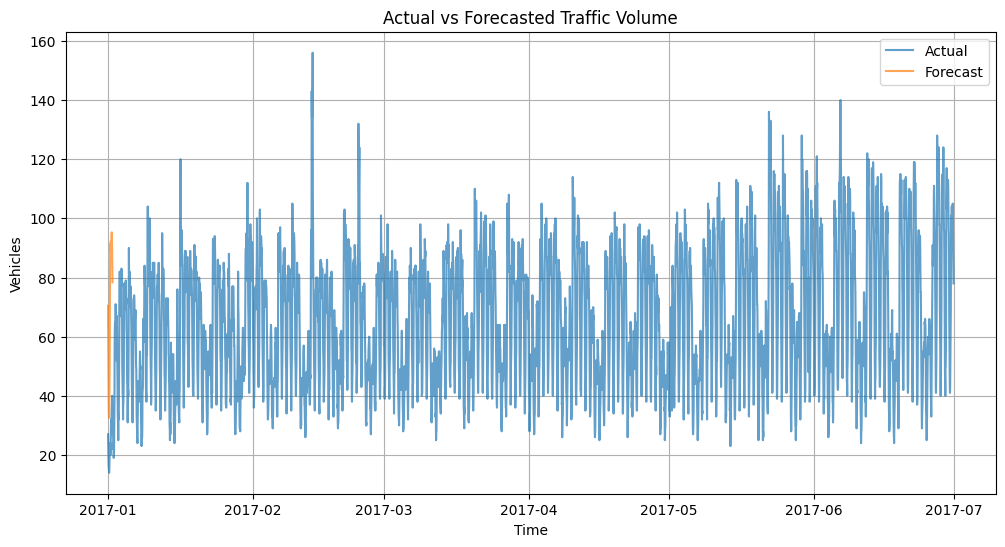

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for visualization
test['Forecast'] = None  # Initialize a column for forecast in test DataFrame
test['Forecast'][:len(forecast)] = forecast['DLinear'].values  # Add forecasted values to test DataFrame

# Plot actual values and forecasts
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', alpha=0.7)  # Actual values
plt.plot(test['ds'][:len(forecast)], forecast['DLinear'], label='Forecast', alpha=0.7)  # Forecasted values

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.title('Actual vs Forecasted Traffic Volume')
plt.legend()
plt.grid()
plt.show()


# Timegpt

In [ ]:
pip install nixtla>=0.5.1

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

/usr/local/lib/python3.10/dist-packages/nixtla/nixtla_client.py:365: UserWarning: `df` contains the following exogenous features: ['DateTime', 'Junction', 'Vehicles', 'ID'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


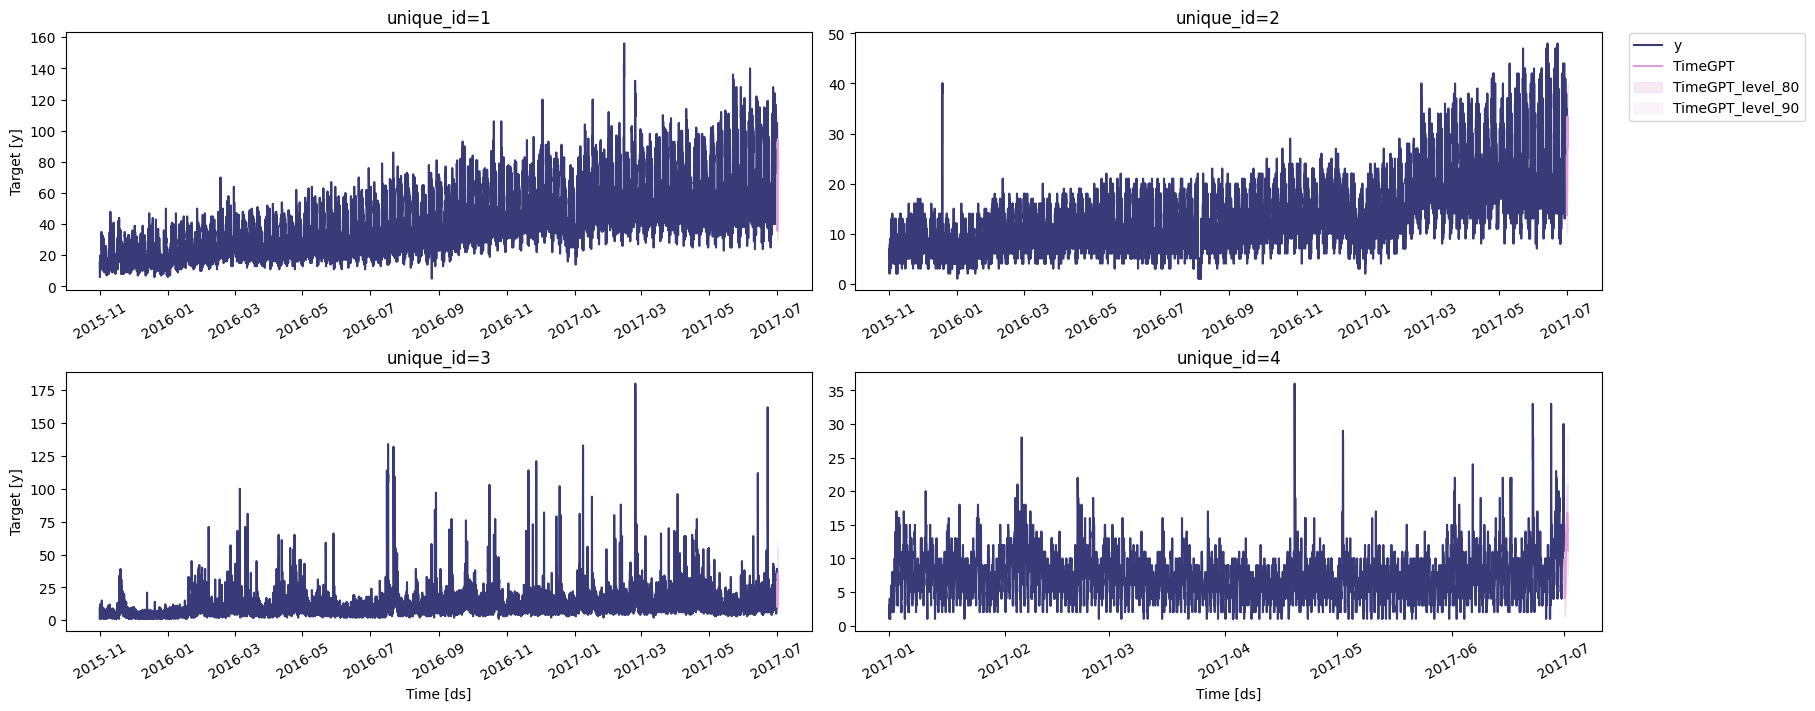

In [ ]:
# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixak-8zIoU2dXC3sWUuWUWNQl9zdhkEyhw4385N8O63ERlo1hnqFW1qv7L7hvrBUbuby7Fhw398cJzmwmfv1f')

# 2. Read historic electricity demand data
file_path = "/content/drive/MyDrive/Colab Notebooks/학부연구생/traffic.csv"
data = pd.read_csv(file_path)

# 데이터 준비
data['ds'] = pd.to_datetime(data['DateTime'])
data['y'] = data['Vehicles']
data['unique_id'] = data['Junction'].astype(str)

# 필요한 열만 선택
forecast_data = data[['unique_id', 'ds', 'y']]


# 3. Forecast the next 24 hours
forecast_data = nixtla_client.forecast(data, h=24, level=[80, 90])

# 4. Plot your results (optional)
nixtla_client.plot(data, forecast_data, level=[80, 90])

/usr/local/lib/python3.10/dist-packages/nixtla/nixtla_client.py:365: UserWarning: `df` contains the following exogenous features: ['DateTime', 'Junction', 'Vehicles', 'ID'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


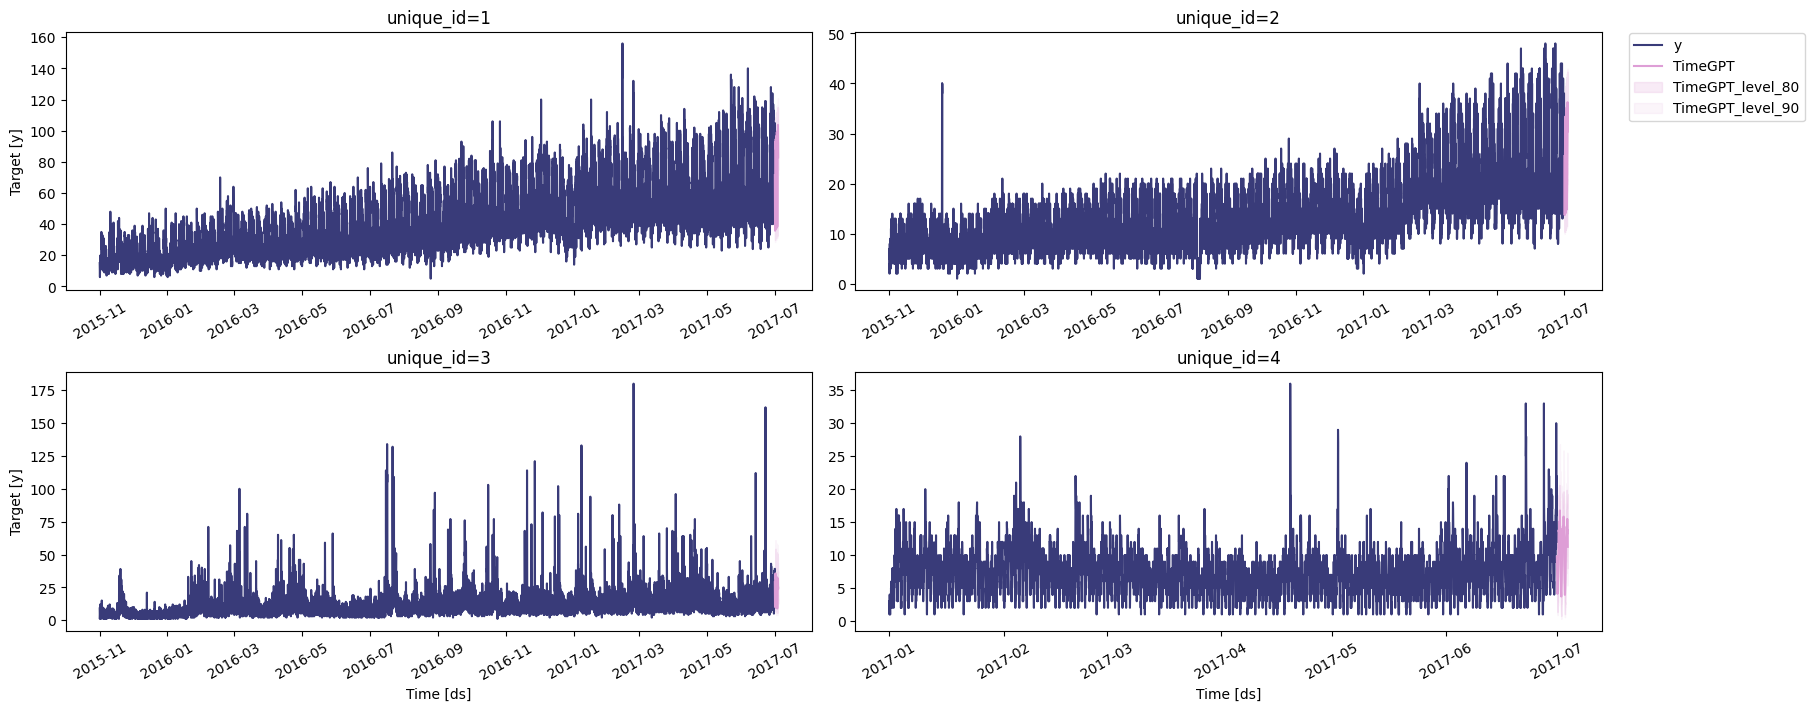

In [ ]:
# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixak-8zIoU2dXC3sWUuWUWNQl9zdhkEyhw4385N8O63ERlo1hnqFW1qv7L7hvrBUbuby7Fhw398cJzmwmfv1f')

# 2. Read historic electricity demand data
file_path = "/content/drive/MyDrive/Colab Notebooks/학부연구생/traffic.csv"
data = pd.read_csv(file_path)

# 데이터 준비
data['ds'] = pd.to_datetime(data['DateTime'])
data['y'] = data['Vehicles']
data['unique_id'] = data['Junction'].astype(str)

# 필요한 열만 선택
forecast_data = data[['unique_id', 'ds', 'y']]


# 3. Forecast the next 24 hours
forecast_data = nixtla_client.forecast(data, h=72, level=[80, 90])

# 4. Plot your results (optional)
nixtla_client.plot(data, forecast_data, level=[80, 90])

In [ ]:
# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixak-8zIoU2dXC3sWUuWUWNQl9zdhkEyhw4385N8O63ERlo1hnqFW1qv7L7hvrBUbuby7Fhw398cJzmwmfv1f')

# 2. Read historic electricity demand data
file_path = "/content/drive/MyDrive/Colab Notebooks/학부연구생/traffic.csv"
data = pd.read_csv(file_path)

# 데이터 준비
data['ds'] = pd.to_datetime(data['DateTime'])
data['y'] = data['Vehicles']
data['unique_id'] = data['Junction'].astype(str)

# 필요한 열만 선택
anomalies_df = nixtla_client.detect_anomalies(data, time_col='ds', target_col='y', freq='D')

# 4. Plot your results (optional)
nixtla_client.plot(data, anomalies_df, level=[80, 90])

ValueError: Series contain missing or duplicate timestamps, or the timestamps do not match the provided frequency.
Please make sure that all series have a single observation from the first to the last timestamp and that the provided frequency matches the timestamps'.
You can refer to https://docs.nixtla.io/docs/tutorials-missing_values for an end to end example.